# Norway New Car Sales Dataset

Norway_new_car_sales_by_model.csv file contains information of the new car sales in Norway between the years 2007-2017.
<br>The dataset was obtained from www.kaggle.com web site.
<br>The dataset comprises of monthly car sale quantity for various manufacturers and
models.
<br>Make columns shows the manufacturer and Pct column shows the percent share in
monthly total sales.

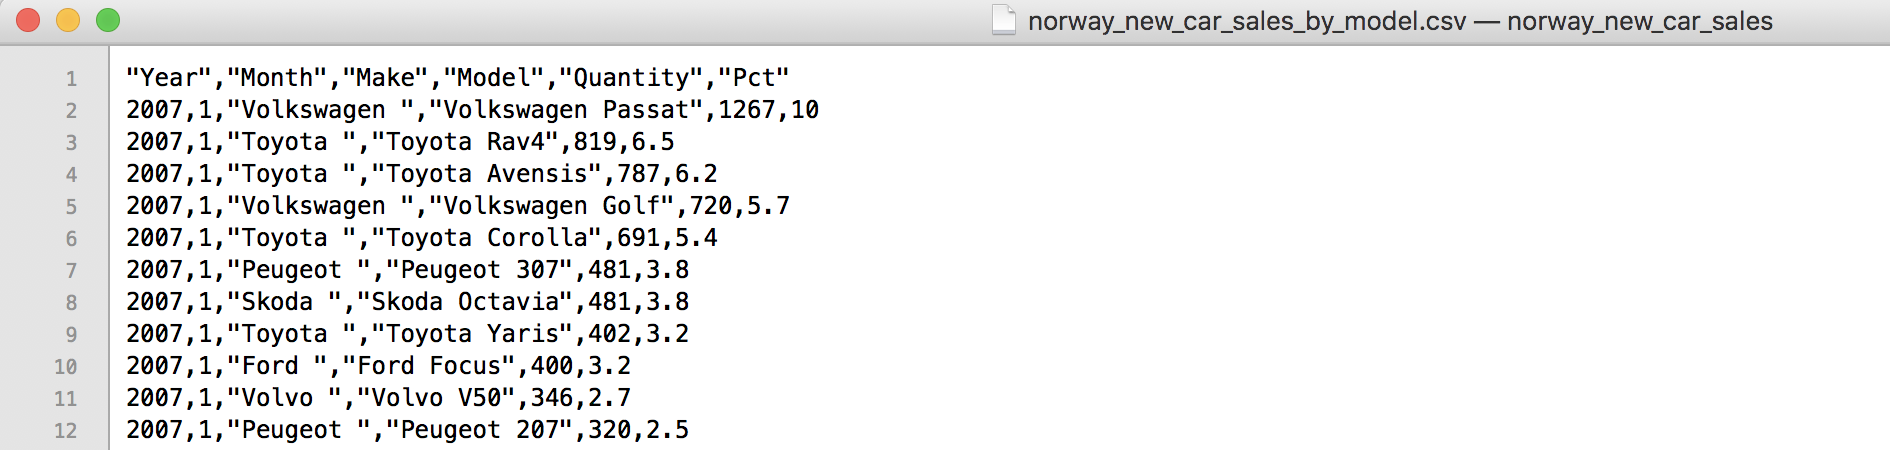

• Let’s first read datafile into a pandas dataframe object.

In [ ]:
import pandas as pd
data=pd.read_csv("norway_new_car_sales_by_model.csv",encoding="latin-1")

In [ ]:
data.head()

 Find the months that models that Toyota sold more than 500 in a month.

In [ ]:
data[(data.Quantity>500) & (data.Make=="Toyota ")]

• Find the months that Toyota Rav4 sold more than 500 in a month.

In [ ]:
data[(data.Quantity>500) & (data.Make=="Toyota ") & (data.Model=="Toyota Rav4")]

You can do this task using data.query method as well.

In [ ]:
data.query("Quantity > 500 & Make=='Toyota ' & Model=='Toyota Rav4'")

## Find total sales of Toyota between the years 2010-2015.

First find the Toyota sales for the years between 2010-2015

In [ ]:
data.query("2010<Year<2015 & Make=='Toyota '")

In [ ]:
data.query("2010<Year<2015 & Make=='Toyota '").sum()

In [ ]:
data.query("2010<Year<2015 & Make=='Toyota '").Quantity.sum()

## Find unique models in the dataset.

In [ ]:
data.Model.unique()

## Extracting data for certain models

In [ ]:
data[data.Model.isin(["Toyota Avensis","Audi A3","Volvo V70"])]

## Finding the months that Toyota has high sales amount for its models.


In [ ]:
data_toyota=data[data.Make=="Toyota "]

In [ ]:
data_toyota.head()

In [ ]:
data_toyota.sort_values(by="Quantity",ascending=False).head()

## Reading data in multi-index format



In [ ]:
data=pd.read_csv("norway_new_car_sales_by_model.csv",encoding="latin-1",index_col=["Year","Month","Make"])

In [ ]:
data.head()

In [ ]:
data.loc[2010,5]

Calculating total sales for each year.

In [ ]:
data.sum(level=0)

In [ ]:
data.Quantity.sum(level=0)

• Operations on different levels

In [ ]:
data.Quantity.sum(level=2)

To see total sales for each month over the years

In [ ]:
data.Quantity.sum(level=1)

## You can change index of data frame using set_index() method.

In [ ]:
data=pd.read_csv("norway_new_car_sales_by_model.csv",encoding="latin-1")

In [ ]:
data.head()

In [ ]:
data.set_index("Year").head()

Note that set_index by default is not in place operation

In [ ]:
data.head()

In [ ]:
data.set_index(["Year","Month"]).head()

## Slicing through multi-index table

In [ ]:
data=pd.read_csv("norway_new_car_sales_by_model.csv",encoding="latin-1",index_col=["Year","Month","Make","Model"])

In [ ]:
data.head()

In [ ]:
data.loc[2007,1].head()

In [ ]:
data.loc[2007,1:5,"Audi ":"Toyota ",:].head()

In [ ]:
data.sort_index(axis=0,inplace=True)

In [ ]:
data.loc[2007,1:5,"Audi ":"Toyota ",:].head()

To slice in multi-index table we need IndexSlice function

In [ ]:
idx=pd.IndexSlice

In [ ]:
data.loc[idx[2012,1:4,"BMW":"Suzuki",:],["Pct"]]

## Pivot tables can return multi-index table 

let's find total car sales for each model of the each manufacturer

In [ ]:
maketotal=data.pivot_table(values="Quantity",index=["Make","Model"],aggfunc="sum")

In [ ]:
maketotal.head()

In [ ]:
maketotal.loc["BMW ":"Toyota",:]

### Remove the space character in the make column 